## Import packages

In [1]:
import pandas as pd
import warnings
import matplotlib
warnings.filterwarnings('ignore')

from importlib import reload

import Helpers
reload(Helpers)

<module 'Helpers' from 'C:\\Users\\Matth\\git\\DataAnalysisWorkbooks\\warcraftLogs\\RestoDruidAnalyzer\\Helpers.py'>

## Configurations

In [2]:
# Path variables
path_to_data = 'C:\\Users\\Matth\\git\\DataAnalysisWorkbooks\\warcraftLogs\\data\\'

# Set the plot style
matplotlib.style.use('seaborn-notebook')

# Have pandas display all rows?
display_max_rows = True

In [3]:
# Filters
rotating_on_tank = 'Either'  # 'Yes'/'No'/'Either'

spriest = 'Either'  # 'Yes'/'No'/'Either'
innervate = 'Either'  # 'Yes'/'No'/'Either'
bloodlust = 'Either'  # 'Yes'/'No'/'Either'
natures_grace = 'Either'  # 'Yes'/'No'/'Either'
power_infusion = 'Either'  # 'Yes'/'No'/'Either'
nHealers = 'Any' # 4/5/6/'Any'

In [37]:
boss = "Teron Gorefiend"

## Main analysis code

In [38]:
# Read in the dataset
data = pd.read_excel(path_to_data + "top_N_druids.xlsx", sheet_name=boss.replace(" ", ""))

if display_max_rows:
    pd.set_option('display.max_rows', None)

In [39]:
# Apply filters to data
data, n_filters, filters = Helpers.apply_filters(data, rotating_on_tank, spriest, innervate, bloodlust, natures_grace, power_infusion, nHealers)

In [40]:
# Modify columns
data = Helpers.convert_durtion_to_seconds(data)
data = Helpers.add_InnervateOrSpriest_col(data)

In [41]:
data.columns

Index(['Rank', 'Name', 'Server', 'Date', 'Duration', 'nHealers', 'Spriest?',
       'Innervate?', 'Bloodlust?', 'Power Infusion?', 'Nature's Grace?',
       'LB_uptime', 'HPS', '% LB (tick) HPS', '% LB (bloom) HPS',
       '% Rejuv HPS', '% Regrowth HPS', '% Swiftmend HPS', 'Rotating on tank?',
       'Rotation 1', '% Rotation 1', 'Rotation 2', '% Rotation 2',
       'InnervateOrSpriest'],
      dtype='object')

array([[<AxesSubplot:title={'center':'HPS'}>]], dtype=object)

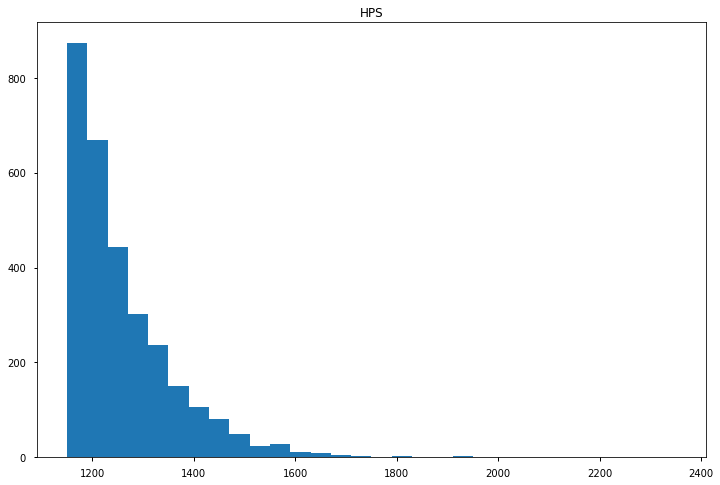

In [42]:
# Distribution of HPS
data.hist(column='HPS', bins=30, grid=False, figsize=(12, 8))

# A straightforward way to compare the rotations is with an errorplot, ie plot the mean HPS of each rotation where the x-error is just the standard error for each distribution:
# δ = σ / sqrt(N)

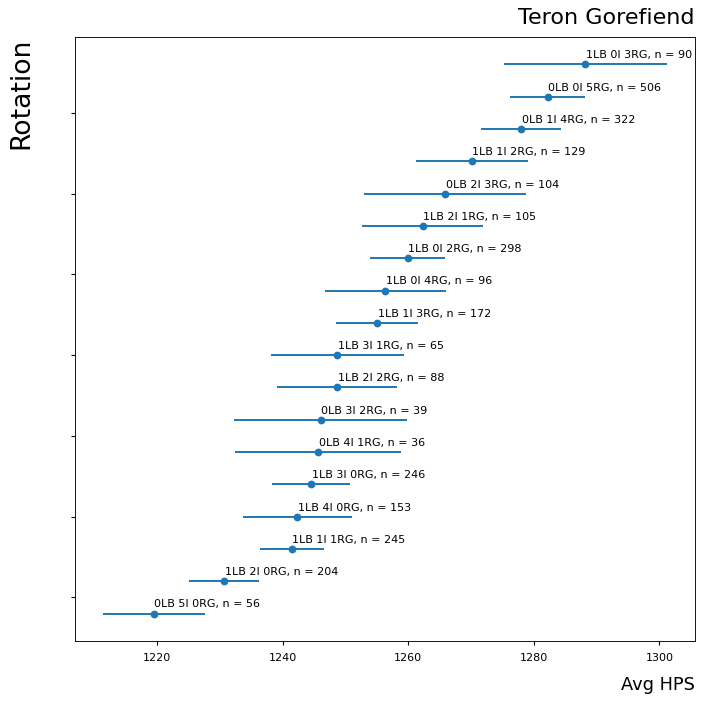

In [10]:
Helpers.plot_rotations(boss, data, n_filters, filters, save=True)

# Split rotation data based on criteria

In [407]:
def set_col(row):
    rot = "0LB 0I 5RG"
    if row["Rotation 1"] == rot and row["Nature's Grace?"] == "Yes":
        return rot + ", NG"
    elif row["Rotation 1"] == rot and row["Nature's Grace?"] == "No":
        return rot + ", ToL"

def split_rotation(df):
    df = df.assign(Rotation_1 = df.apply(set_col, axis=1))
    return df

In [408]:
data = split_rotation(data)

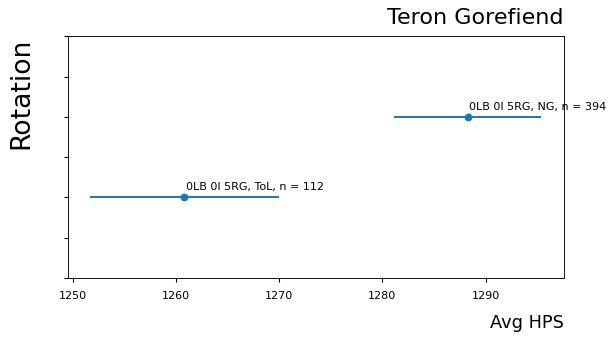

In [421]:
Helpers.plot_split_rotation(boss, data)

# Plot percentages

In [221]:
# What percentage of players are doing a specific rotation?
Helpers.percent_doing_rotation(data, "0LB 1I 4RG")

0.19119119119119118

Yes    0.509503
No     0.490497
Name: Nature's Grace?, dtype: float64

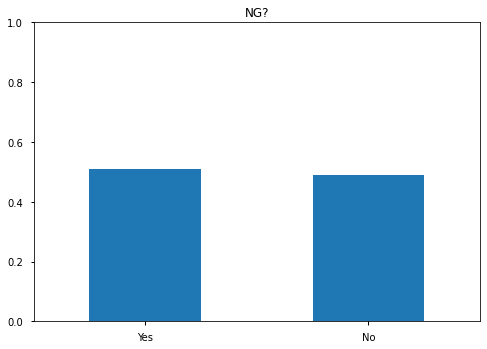

In [186]:
Helpers.plot_yesno_percentage(data, "Nature's Grace?", 'NG?')

0.46998722860791825

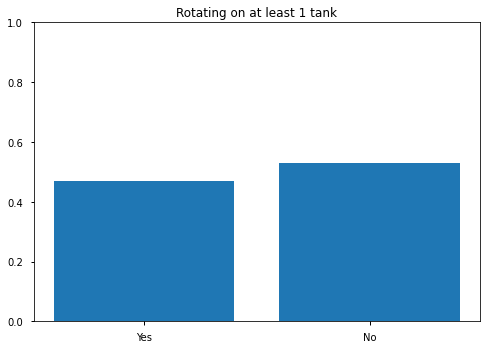

In [385]:
# Use n = -1 to check "At least 1 tank"
Helpers.check_nTank_rotating(data, -1)

# What variables correlate the strongest with HPS?

In [386]:
# Convert "Yes/No" to "1/0" for pandas
data['Spriest?'] = data['Spriest?'].map({'Yes': 1, 'No': 0})
data['Innervate?'] = data['Innervate?'].map({'Yes': 1, 'No': 0})
data['Bloodlust?'] = data['Bloodlust?'].map({'Yes': 1, 'No': 0})
data['Power Infusion?'] = data['Power Infusion?'].map({'Yes': 1, 'No': 0})
data["Nature's Grace?"] = data["Nature's Grace?"].map({'Yes': 1, 'No': 0})
data["InnervateOrSpriest"] = data["InnervateOrSpriest"].map({'Yes': 1, 'No': 0})

In [387]:
data.corr()['HPS'].sort_values(ascending=False)

HPS                   1.000000
% Rotation 1          0.229220
Nature's Grace?       0.112668
Power Infusion?       0.103265
% Regrowth HPS        0.093009
% LB (tick) HPS       0.073796
Spriest?              0.059387
Bloodlust?           -0.048943
% Rotation 2         -0.049559
Innervate?           -0.066811
InnervateOrSpriest   -0.098376
% Swiftmend HPS      -0.124331
Duration             -0.135856
nHealers             -0.138661
% Rejuv HPS          -0.153730
% LB (bloom) HPS     -0.192928
Rank                 -0.810441
Name: HPS, dtype: float64

# Sandbox

<AxesSubplot:xlabel='[Duration]', ylabel='[HPS]'>

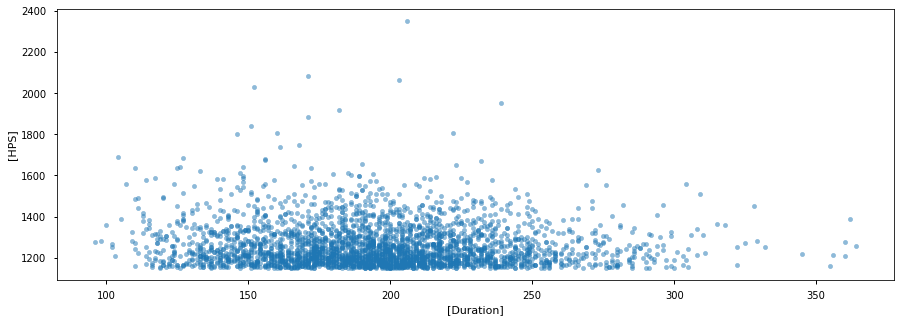

In [43]:
data.plot.scatter(x=['Duration'], y=['HPS'], alpha=0.5, figsize=(15,5))